# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2022
# Gordus Lab 
# April 29, 2022

#  Enzyme Inhibition

The goal of this lab is to plot and understand the kinetics of enzyme inhibition based on the data from Problem #3.

## Libraries you will need

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

## Regression in Python

Any easy regression function to use in Python is `LinearRegression.fit(x,y)`

To calculate the slope and y-intercept, execute the code in the following manner:

`reg = LinearRegression().fit(x, y)`

`slope = reg.coef_[0]`

`y_intercept = reg.intercept_`

An **IMPORTANT** detail:

The x array **MUST** be in column vector for the linear regression function to work. Here is an example of how to promote a row vector into a column vector:

In [2]:
# x is a row vector
x = np.array([1,2,3,4,5])
print('x dimensions: '+str(x.shape))

# Here I promote x to a COLUMN vector
x = x[...,None]

print('x dimensions: '+str(x.shape))



x dimensions: (5,)
x dimensions: (5, 1)


## Question 3.1:
You measure the initial velocities, v0, of an enzyme-catalyzed reaction at several different substrate concentrations. For each substrate concentration, you obtain v0 in the absence and presence of an inhibitor of the enzyme. All other reaction conditions are kept constant. 


Prepare a Lineweaver-Burk plot of both data sets at fit a linearized Michaelis-Menten model to the data. The plots should show the individual data points as well as an appropriate fit. Make sure to label the axes, including units, and report the fitting parameters that you obtain. 
## Student Input Cell

No inhibitor:
y = [2.16200293] * x + [0.66812845]
vmax: [1.49671818] μM/s, Km: [3.23590909] μM

With inhibitor:
y = [2.16281554] * x + [2.89061159]
vmax: [0.34594755] μM/s, Km: [0.74822074] μM



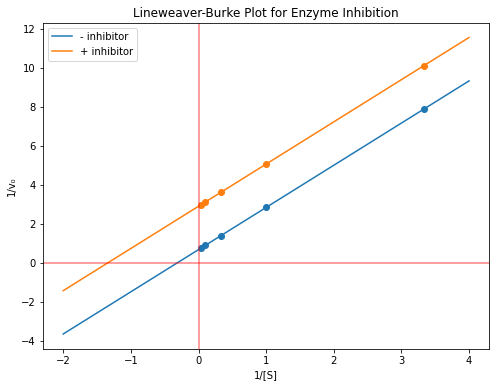

In [3]:
def toCol(x):
    return x[...,None]

data = np.array([[ 0.3  ,  0.127,  0.099],
                 [ 1.   ,  0.353,  0.198],
                 [ 3.   ,  0.72 ,  0.277],
                 [10.   ,  1.132,  0.322],
                 [30.   ,  1.353,  0.337]])

data = 1/data

S = toCol(data[:, 0])
noI = toCol(data[:, 1])
withI = toCol(data[:, 2])

fig, ax = plt.subplots(figsize=(8,6))

step = 0.05
x = np.arange(-2, 4+step, step)
condition = 'No inhibitor:'
for cond in [noI, withI]:
    reg = LinearRegression().fit(S, cond)
    slope = reg.coef_[0]
    yInt = reg.intercept_
    
    y = slope * x + yInt
    ax.plot(x, y)
    print(condition)
    condition = 'With inhibitor:'
    print('y = {} * x + {}'.format(slope, yInt))
    print('vmax: {} \u03BCM/s, Km: {} \u03BCM\n'.format(1/yInt, slope/yInt))
    
ax.scatter(S, noI)
ax.scatter(S, withI)
ax.axhline(y=0, color='r', linestyle='-', alpha=0.5)
ax.axvline(x=0, color='r', linestyle='-', alpha=0.5)
ax.set_title('Lineweaver-Burke Plot for Enzyme Inhibition')
ax.set_xlabel('1/[S]')
ax.set_ylabel('1/v\u2080')
ax.legend(['- inhibitor', '+ inhibitor'])

plt.show()

In [4]:
# Calculation for question 3.4
Km = 3.23590909 * 10**-6
Km_star = 0.74822074 * 10**-6
i_constant = 750 * 10**-6
i_conc = (Km/Km_star - 1) * i_constant
print(str(i_conc), 'M')

0.002493604043239966 M


# 
# 
# 
# 
# 
# 
# Question II.6 on Exam 04

In [5]:
def multiply(a, b):
    product = []
    for x,y in zip(a,b):
        product.append(x*y)
    return product

E = 10**-8
S = 5 * 10**-3
part = ['original', 'a', 'b', 'c']
k = [3*(10**4), 1.5, 18]
change = [[1, 1, 1], 
          [2, 1, 1], 
          [1, 0.5, 1], 
          [1, 1, 2]]
for i in range(4):
    [k1, kr, k2] = multiply(k, change[i])
    Km = (kr + k2) / k1
    vmax = k2 * E
    
    v0 = vmax / (1 + Km / S)
    
    print(part[i]+':', str(v0))

original: 1.592920353982301e-07
a: 1.6901408450704225e-07
b: 1.6e-07
c: 2.88e-07


In [23]:
def listToNum(l):
    return int("".join([str(digit) for digit in l]))

def iterKaprekar(n):
    last_num = 0
    i = 0
    while n != last_num:
        n_list = [int(x) for x in str(n)]
        n_list.sort()
        asc = listToNum(n_list)
        n_list.sort(reverse=True)
        des = listToNum(n_list)

        new_n = des - asc
        last_num = n
        n = new_n
        i += 1
    return (new_n, i)
        
for i in range(1000, 10000):
    (final, iters) = iterKaprekar(i)
    if final != 6174:
        print(i, iters)

1000 3
1011 3
1101 3
1110 3
1111 2
1112 3
1121 3
1211 3
1222 3
2111 3
2122 3
2212 3
2221 3
2222 2
2223 3
2232 3
2322 3
2333 3
3222 3
3233 3
3323 3
3332 3
3333 2
3334 3
3343 3
3433 3
3444 3
4333 3
4344 3
4434 3
4443 3
4444 2
4445 3
4454 3
4544 3
4555 3
5444 3
5455 3
5545 3
5554 3
5555 2
5556 3
5565 3
5655 3
5666 3
6555 3
6566 3
6656 3
6665 3
6666 2
6667 3
6676 3
6766 3
6777 3
7666 3
7677 3
7767 3
7776 3
7777 2
7778 3
7787 3
7877 3
7888 3
8777 3
8788 3
8878 3
8887 3
8888 2
8889 3
8898 3
8988 3
8999 3
9888 3
9899 3
9989 3
9998 3
9999 2
